--- Parsing LaTeX Data ---
--- Data Parsed Successfully ---
    agents  avg_runtime  std_runtime  avg_steps  std_steps
0        4        21.38        16.35       3651       2740
1        7        46.04        21.74       5881       2680
2       10        63.49        22.61       7773       2636
3       20       129.29        33.05      12935       3248
4       25       161.54        34.53      14920       3069
5       29       177.95        34.59      15852       2913
6       35       217.73        38.76      17668       2995
7       50       286.45        64.95      20510       4435
8       58       316.99        76.63      22831       5358
9       75       428.42       111.40      26960       6449
10      86       467.96       106.82      31694       7246
11     100       650.65       179.95      42453      11742

--- Generating Plots ---
Generating plot for average runtimes...
Generating plot for average number of steps...

Plots saved to 'scaling_plots.png' and 'scaling_plots.pdf'


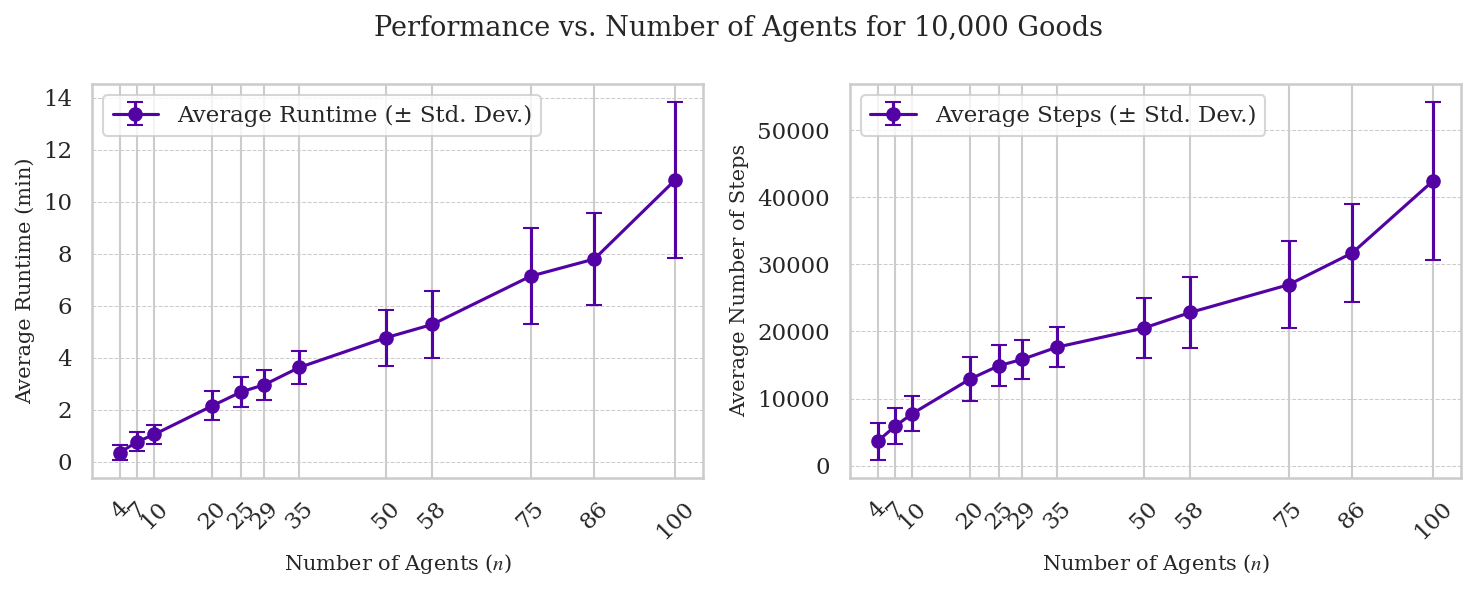


--- Plotting Complete ---


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

def parse_latex_table(latex_string):
    """
    Parses a LaTeX table string to extract agent, runtime, and step data.
    """
    pattern = re.compile(
        r"""
        \{\s*(\d+)\s*\}\s*&\s*                               # Group 1: Number of agents (e.g., {4})
        \\makecell\{([\d.]+)\s*(?:\\\\\s*)?                  # Group 2: Average runtime (digits and dots)
        \$\s*\\pm\s*\$\s*                                   # Match the literal "$\pm$"
        ([\d.]+)\}\s*&\s*                                   # Group 3: Std dev runtime (digits and dots)
        \\makecell\{([\d.]+)\s*(?:\\\\\s*)?                  # Group 4: Average steps (digits and dots)
        \$\s*\\pm\s*\$\s*                                   # Match the literal "$\pm$" again
        ([\d.]+)                                            # Group 5: Std dev steps (digits and dots)
        \}
        """,
        re.VERBOSE
    )

    matches = pattern.findall(latex_string)

    if not matches:
        print("Could not find any data matching the pattern in the LaTeX string.")
        return None

    df = pd.DataFrame(matches, columns=[
        'agents',
        'avg_runtime', 'std_runtime',
        'avg_steps', 'std_steps'
    ])

    df = df.astype({
        'agents': int,
        'avg_runtime': float,
        'std_runtime': float,
        'avg_steps': float,
        'std_steps': float
    })

    df['avg_steps'] = df['avg_steps'].astype(int)
    df['std_steps'] = df['std_steps'].astype(int)

    return df

def plot_data(df):
    """
    Generates and displays two plots side-by-side in a single figure,
    using a Times New Roman font, and saves the result to a file.
    """
    if df is None:
        print("DataFrame is empty. Cannot create plots.")
        return

    # Convert runtime from seconds to minutes
    df['avg_runtime_min'] = df['avg_runtime'] / 60
    df['std_runtime_min'] = df['std_runtime'] / 60

    # Set a nice visual style for the plots
    sns.set_theme(style="whitegrid", palette="plasma")

    # Font Configuration for a more academic look
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
    plt.rcParams['mathtext.fontset'] = 'stix'

    # Create a single figure with two subplots
    # CHANGED: Adjusted figsize for a more compact look without subplot titles
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=150)

    # Add a main title for the entire figure
    fig.suptitle('Performance vs. Number of Agents for 10,000 Goods', fontsize=13)

    # --- Plot 1: Average Runtimes (on the left axis, ax1) ---
    print("Generating plot for average runtimes...")

    ax1.errorbar(
        x=df['agents'],
        y=df['avg_runtime_min'],
        yerr=df['std_runtime_min'],
        fmt='-o',
        capsize=4,
        label='Average Runtime (± Std. Dev.)'
    )
    # REMOVED: ax1.set_title(...) to avoid redundancy
    ax1.set_xlabel('Number of Agents ($n$)', fontsize=10)
    ax1.set_ylabel('Average Runtime (min)', fontsize=10)
    ax1.set_xticks(df['agents'])
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
    ax1.legend()

    # --- Plot 2: Average Number of Steps (on the right axis, ax2) ---
    print("Generating plot for average number of steps...")

    ax2.errorbar(
        x=df['agents'],
        y=df['avg_steps'],
        yerr=df['std_steps'],
        fmt='-o',
        capsize=4,
        label='Average Steps (± Std. Dev.)'
    )
    # REMOVED: ax2.set_title(...) to avoid redundancy
    ax2.set_xlabel('Number of Agents ($n$)', fontsize=10)
    ax2.set_ylabel('Average Number of Steps', fontsize=10)
    ax2.set_xticks(df['agents'])
    ax2.tick_params(axis='x', rotation=45)
    ax2.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
    ax2.legend()

    # Adjust layout to prevent overlap and save the figure
    # CHANGED: Simplified the call to tight_layout
    plt.tight_layout()
    plt.savefig("scaling_plots.png", dpi=300)
    plt.savefig("scaling_plots.pdf")
    print("\nPlots saved to 'scaling_plots.png' and 'scaling_plots.pdf'")

    # Show the single figure with both plots
    plt.show()


def main():
    """
    Main function to parse the data and generate plots.
    """
    latex_table = r"""
    \begin{small}
    \begin{tabular}{|c|c|c|}
    \hline
    \textbf{\makecell{Agents \\  ($n$)}} & \makecell{\textbf{Avg. runtime (s)} \\ \textbf{Std. dev. (s)}} &  \makecell{\textbf{Avg. \# of steps} \\ \textbf{Std. dev.}}  \\
    \hline \hline
    {4}   &  \makecell{21.38 $\pm$ 16.35} & \makecell{3651 $\pm$ 2740} \\ \hline
    {7}   &  \makecell{46.04 $\pm$ 21.74} & \makecell{5881 $\pm$ 2680} \\ \hline
    {10}   &  \makecell{63.49 $\pm$ 22.61} & \makecell{7773 $\pm$ 2636} \\ \hline
    {20}   &  \makecell{129.29 $\pm$ 33.05} & \makecell{12935 $\pm$ 3248} \\ \hline
    {25}   &  \makecell{161.54 $\pm$ 34.53} & \makecell{14920 $\pm$ 3069} \\ \hline
    {29}   &  \makecell{177.95 $\pm$ 34.59} & \makecell{15852 $\pm$ 2913} \\ \hline
    {35}   &  \makecell{217.73 $\pm$ 38.76} & \makecell{17668 $\pm$ 2995} \\ \hline
    {50}   &  \makecell{286.45 $\pm$ 64.95} & \makecell{20510 $\pm$ 4435} \\ \hline
    {58}   &  \makecell{316.99 $\pm$ 76.63} & \makecell{22831 $\pm$ 5358} \\ \hline
    {75}   &  \makecell{428.42 $\pm$ 111.40} & \makecell{26960 $\pm$ 6449} \\ \hline
    {86}   &  \makecell{467.96 $\pm$ 106.82} & \makecell{31694 $\pm$ 7246} \\ \hline
    {100}  & \makecell{650.65 $\pm$ 179.95} & \makecell{42453 $\pm$ 11742} \\ \hline
    \hline
    \end{tabular}
    \caption{Runtime to find an EFX allocation for instances with $10^4$ items and a varying number of agents. Each entry is based on 100 independent runs.}
    \label{tab:scaling_n_fixed_m}
    \end{small}
    """

    print("--- Parsing LaTeX Data ---")
    data_df = parse_latex_table(latex_table)

    if data_df is not None:
        print("--- Data Parsed Successfully ---")
        print(data_df)
        print("\n--- Generating Plots ---")
        plot_data(data_df)
        print("\n--- Plotting Complete ---")
    else:
        print("--- Data Parsing Failed ---")

if __name__ == "__main__":
    main()